In [ ]:
!pip install forex-python

In [ ]:
from forex_python.bitcoin import BtcConverter

b = BtcConverter()

In [117]:
from datetime import datetime, timedelta

start = datetime(2015,1,1)
end = datetime(2021,12,27)

In [118]:
price_data = b.get_previous_price_list('USD', start, end)

In [119]:
len(price_data)

2553

In [120]:
list(price_data.keys())[:10]

['2015-01-01',
 '2015-01-02',
 '2015-01-03',
 '2015-01-04',
 '2015-01-05',
 '2015-01-06',
 '2015-01-07',
 '2015-01-08',
 '2015-01-09',
 '2015-01-10']

In [121]:
import pandas

prices = pandas.DataFrame(price_data.items(), columns=["date", "price"])

In [122]:
prices.head()

,date,price
0,2015-01-01,313.9247
1,2015-01-02,314.5916
2,2015-01-03,279.8507
3,2015-01-04,263.6343
4,2015-01-05,272.9486


In [123]:
prices = prices.set_index('date')

In [124]:
prices.head()

,price
date,
2015-01-01,313.9247
2015-01-02,314.5916
2015-01-03,279.8507
2015-01-04,263.6343
2015-01-05,272.9486


In [125]:
prices.loc["2017-01-01":"2018-01-01"]

,price
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2017-12-28,14428.7600
2017-12-29,14427.8700
2017-12-30,12629.8138


<AxesSubplot:xlabel='date'>

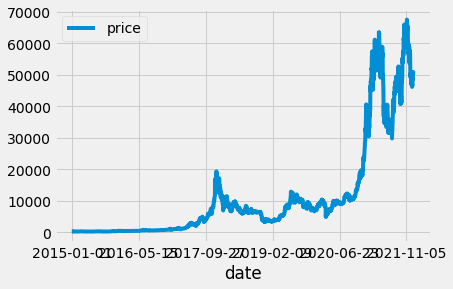

In [126]:
prices.plot()

<AxesSubplot:xlabel='date'>

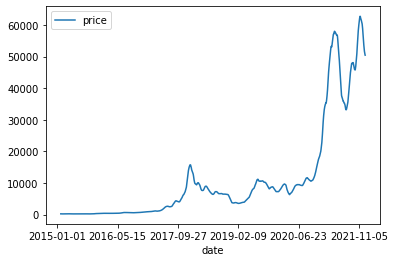

In [61]:
prices.rolling(30).mean().plot()

In [83]:
rolling = prices.rolling(30).mean()

In [ ]:
# January 31st, 2020 as start of pandemic

<AxesSubplot:xlabel='date'>

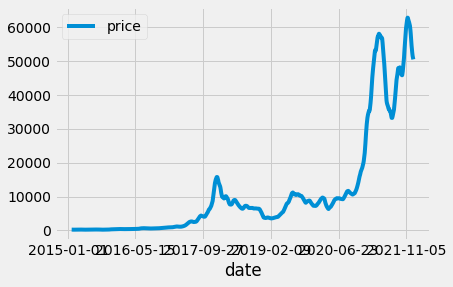

In [84]:
import matplotlib.style as style
style.use('fivethirtyeight')

rolling.plot()

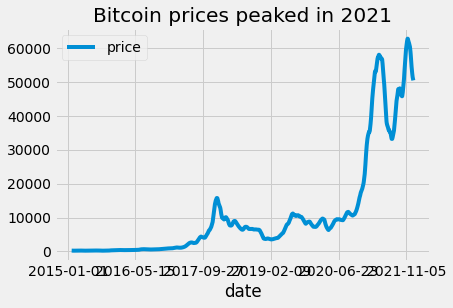

In [102]:
import matplotlib.pyplot as plt

ax = rolling.plot()

plt.title("Bitcoin prices peaked in 2021")
plt.show()

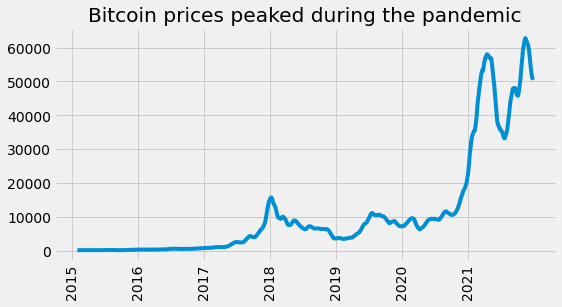

In [110]:
import matplotlib.dates as dates

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(rolling.index.values,
        rolling["price"],
        linewidth=4)

ticks = ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01"]
tick_labels = ["2015", "2016", "2017", "2018", "2019", "2020", "2021"]

plt.title("Bitcoin prices peaked in 2021")
plt.xticks(ticks, rotation="vertical")
ax.set_xticklabels(tick_labels)
plt.show()

In [109]:
prices.loc["2021-07-27"]

price    39489.8683
Name: 2021-07-27, dtype: float64

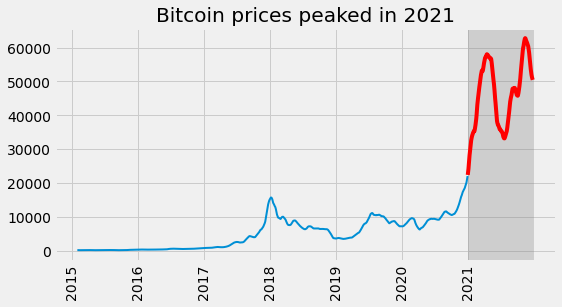

In [115]:
pre_2021 = rolling.loc[:"2020-12-31"]
post_2021 = rolling.loc["2021-01-01":]


fig,ax = plt.subplots(figsize=(8,4))
ax.plot(pre_2021.index.values,
        pre_2021["price"],
        linewidth=2)

ax.plot(post_2021.index.values,
        post_2021["price"],
        linewidth=4, color="red")

ax.axvspan(xmin=2192, xmax=361 + 2192, ymin=0,
           alpha=0.3, color='grey')

ticks = ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01"]
tick_labels = ["2015", "2016", "2017", "2018", "2019", "2020", "2021"]

plt.title("Bitcoin prices peaked in 2021")
plt.xticks(ticks, rotation="vertical")
ax.set_xticklabels(tick_labels)
plt.show()

In [114]:
post_2021.shape

(361, 1)